<a id="toc"></a>

# <u>Table of Contents</u>

1.) [Imports](#imports)  
2) [Pollutants](#pollutants)  
&nbsp;&nbsp;&nbsp;&nbsp; 2.1.) [Missing values](#poll_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.2.) [General location](#poll_gen_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.3.) [Specific location](#poll_spec_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.4.) [Matrix](#poll_matrix)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.5.) [Method](#poll_method)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.6.) [Study Name](#poll_study)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.7.) [Parameter](#poll_param)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.8.) [NST Site](#poll_nst_site)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.9.) [Fiscal Year ](#fiscal)   
3.) [Sites](#sites)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.1.) [Missing values](#site_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 3.2.) [NST Site](#site_nst)   
&nbsp;&nbsp;&nbsp;&nbsp; 3.3.) [General Location](#site_gen_loc)   
4.) [Histopaths](#histopaths)  
&nbsp;&nbsp;&nbsp;&nbsp; 4.1.) [Missing values](#hist_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.2.) [NST Site](#hist_nst_site)   

---
<a id="imports"></a>

# [^](#toc)<u>Imports</u>

In [1]:
### Standard imports
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50

### Standard plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Fancy plot of Earth (This library is really cool and fast!)
import folium
from folium.plugins import MarkerCluster

### Removes warnings from output
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = "../../data/mussel/"

### Styling helpers

In [2]:
# A short hand way to plot most bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

---
<a id="pollutants"></a>

# [^](#toc) <u>Pollutants</u>

In [10]:
pollutants = pd.read_csv(DATA_PATH + "pollutants.csv")
print("Shape of pollutants data:", pollutants.shape)

num_cols = [col for col in pollutants.columns if pollutants[col].dtype != object]
cat_cols = [col for col in pollutants.columns if pollutants[col].dtype == object]

print("\n{}Numeric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_cols))

print("\n{}Categoric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_cols))

pollutants.head()

Shape of pollutants data: (769926, 22)

Numeric columns:
fiscal_year --- latitude --- longitude --- result

Categoric columns:
coastal_ecological_area --- collection_date --- general_location --- matrix --- method --- nst_sample_id --- nst_site --- parameter --- parameter_name --- qualifier --- region_name --- scientific_name --- source_file --- specific_location --- state_name --- stratum --- study_name --- units


,coastal_ecological_area,collection_date,fiscal_year,general_location,latitude,longitude,matrix,method,nst_sample_id,nst_site,parameter,parameter_name,qualifier,region_name,result,scientific_name,source_file,specific_location,state_name,stratum,study_name,units
0,NaN,18AUG2015:00:00:00.000,2015.0,Chukchi Sea,NaN,NaN,Sediment,B&B SOP1006,BA2015AKC-15-005bSED,AKC_15-005,"1,6,7-Trimethylnaphthalene",NaN,Below the MDL,NaN,0.104,Sediment,AlaskaArcticStudy_Organics_Sediment.csv,Peard Bay,NaN,NaN,Alaska Arctic Study,ng/dry g
1,NaN,18AUG2015:00:00:00.000,2015.0,Chukchi Sea,NaN,NaN,Sediment,B&B SOP1006,BA2015AKC-15-005bSED,AKC_15-005,1-Methyldibenzothiophene,NaN,Below the MDL,NaN,0.038,Sediment,AlaskaArcticStudy_Organics_Sediment.csv,Peard Bay,NaN,NaN,Alaska Arctic Study,ng/dry g
2,NaN,18AUG2015:00:00:00.000,2015.0,Chukchi Sea,NaN,NaN,Sediment,B&B SOP1006,BA2015AKC-15-005bSED,AKC_15-005,1-Methylfluorene,NaN,NaN,NaN,0.447,Sediment,AlaskaArcticStudy_Organics_Sediment.csv,Peard Bay,NaN,NaN,Alaska Arctic Study,ng/dry g
3,NaN,18AUG2015:00:00:00.000,2015.0,Chukchi Sea,NaN,NaN,Sediment,B&B SOP1006,BA2015AKC-15-005bSED,AKC_15-005,1-Methylnaphthalene,NaN,NaN,NaN,0.595,Sediment,AlaskaArcticStudy_Organics_Sediment.csv,Peard Bay,NaN,NaN,Alaska Arctic Study,ng/dry g
4,NaN,18AUG2015:00:00:00.000,2015.0,Chukchi Sea,NaN,NaN,Sediment,B&B SOP1006,BA2015AKC-15-005bSED,AKC_15-005,1-Methylphenanthrene,NaN,NaN,NaN,0.460,Sediment,AlaskaArcticStudy_Organics_Sediment.csv,Peard Bay,NaN,NaN,Alaska Arctic Study,ng/dry g


<a id="poll_nan"></a>

### [^](#toc) Missing values

In [5]:
missing_cols = pollutants.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index
pollutants[missing_cols].isnull().sum()

coastal_ecological_area    769562
collection_date             94935
fiscal_year                   364
general_location                3
latitude                   769562
longitude                  769562
matrix                        364
method                       6654
nst_sample_id                 364
parameter                    1100
parameter_name             769190
qualifier                  447502
region_name                769562
result                        364
scientific_name               364
specific_location               3
state_name                 769562
stratum                    769592
units                         364
dtype: int64

### Missing values in location (general and specific)

Nice general and specifica are missing from the same rows.  I can probably delete these two rows since they don't seem to contain any information

In [6]:
pollutants[(pollutants.general_location.isnull()) | (pollutants.specific_location.isnull())]

,coastal_ecological_area,collection_date,fiscal_year,general_location,latitude,longitude,matrix,method,nst_sample_id,nst_site,...,qualifier,region_name,result,scientific_name,source_file,specific_location,state_name,stratum,study_name,units
7761,Alaska South Central - Cook Inlet,NaN,NaN,NaN,59.20715,-151.81512,NaN,NaN,NaN,CICB,...,NaN,Alaska,NaN,NaN,Sites_KachemakBayBioeffects2009.csv,NaN,Alaska,NaN,Kachemak Bay Bioeffects,NaN
7780,Alaska South Central - Cook Inlet,NaN,NaN,NaN,59.46741,-151.53439,NaN,NaN,NaN,KB2_KJ-2,...,NaN,Alaska,NaN,NaN,Sites_KachemakBayBioeffects2009.csv,NaN,Alaska,NaN,Kachemak Bay Bioeffects,NaN
7790,Alaska South Central - Cook Inlet,NaN,NaN,NaN,59.42355,-151.31118,NaN,NaN,NaN,KBTB,...,NaN,Alaska,NaN,NaN,Sites_KachemakBayBioeffects2009.csv,NaN,Alaska,NaN,Kachemak Bay Bioeffects,NaN


### Distribution of pollutants

In [135]:
pollutants.isnull().sum()

coastal_ecological_area    769562
collection_date             94935
fiscal_year                   364
general_location                3
latitude                   769562
longitude                  769562
matrix                        364
method                       6654
nst_sample_id                 364
nst_site                        0
parameter                    1100
parameter_name             769190
qualifier                  447502
region_name                769562
result                        364
scientific_name               364
source_file                     0
specific_location               3
state_name                 769562
stratum                    769592
study_name                      0
units                         364
dtype: int64

In [11]:
locations = [("Alaska, US", [59.7, -152.5]), ("Washington, US", [48.2, -123])]

# Zoom in on which location
location  = locations[1]

In [15]:
m = folium.Map(location=location[1], zoom_start=8)

marker_cluster = MarkerCluster().add_to(m)

for key, group in pollutants.groupby("coastal_ecological_area"):
    for lat, lon, nst_site in group[["latitude", "longitude", "nst_site"]].values:    
        folium.Marker(
            location=[lat, lon],
            popup="{} - {}".format(nst_site, key),
            icon=folium.Icon(color='green', icon='ok-sign'),
        ).add_to(marker_cluster)
        
m

### Fill in location missing values

(Check if they are the same rows that have missing names)

In [7]:
cols = ["general_location", "specific_location"]
pollutants[cols] = pollutants[cols].fillna("Location unknown")

<a id="poll_gen_loc"></a>

### [^](#toc) General location

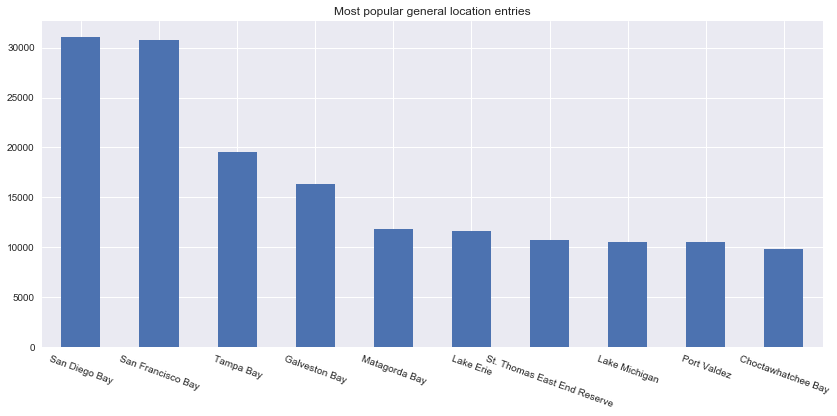

In [8]:
plt.figure(figsize=(14, 6))
temp = pollutants.general_location.value_counts().head(10)
_ = temp.plot(kind="bar", title="Most popular general location entries", rot=-20)

<a id="poll_spec_loc"></a>

### [^](#toc) Specific location

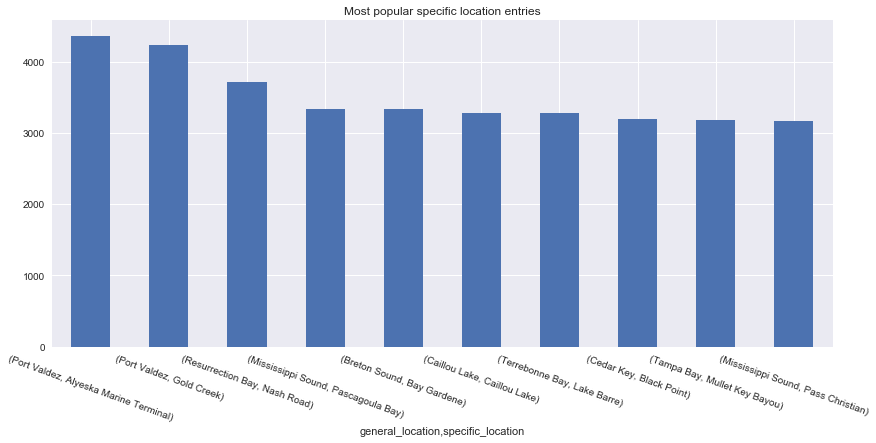

In [9]:
plt.figure(figsize=(14, 6))
temp = pollutants.groupby(["general_location", "specific_location"])["specific_location"].count().sort_values(ascending=False).head(10)
_ = temp.plot(kind="bar", title="Most popular specific location entries", rot=-20)

<a id="poll_matrix"></a>

### [^](#toc) Matrix

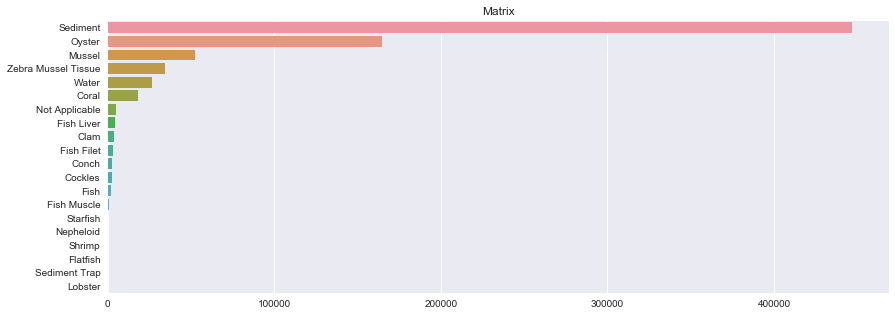

In [10]:
plt.figure(figsize=(14, 5))
temp = pollutants.matrix.value_counts()
_ = sns.barplot(temp.values, temp.index).set(title="Matrix")

<a id="poll_method"></a>

### [^](#toc) Method

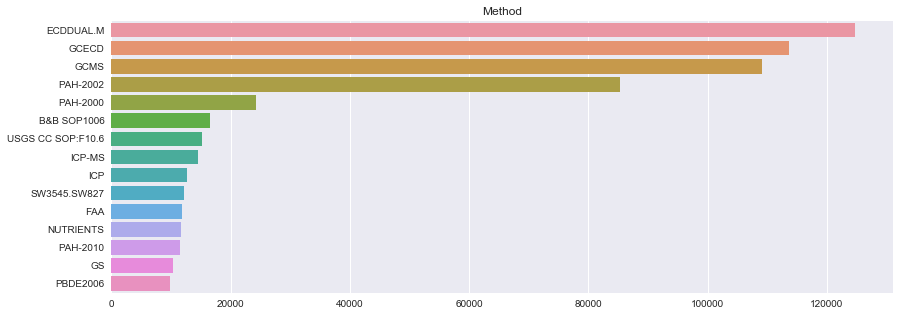

In [11]:
plt.figure(figsize=(14, 5))
temp = pollutants.method.value_counts().head(15)
_ = sns.barplot(temp.values, temp.index).set(title="Method")

<a id="poll_study"></a>

### [^](#toc) Study Name

"The study for which the given record was collected. "

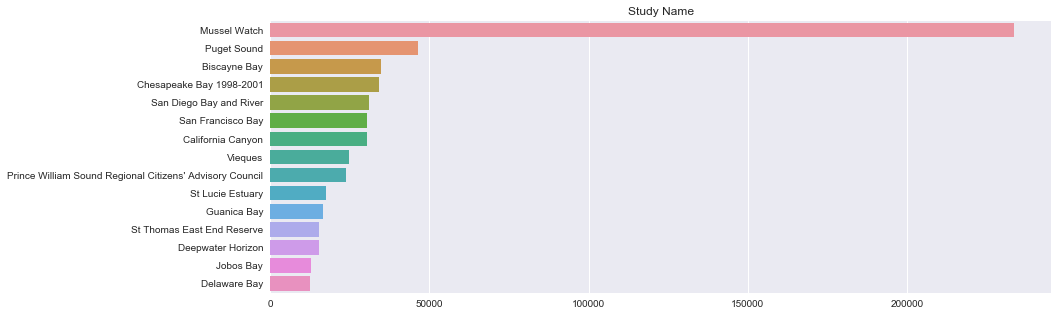

In [12]:
plt.figure(figsize=(14, 5))
temp = pollutants.study_name.value_counts().head(15)
_ = sns.barplot(temp.values, temp.index).set(title="Study Name")

<a id="poll_param"></a>

### [^](#toc) Parameter

parameter_name does not seem to have much useful information, partly giving information already expressed here

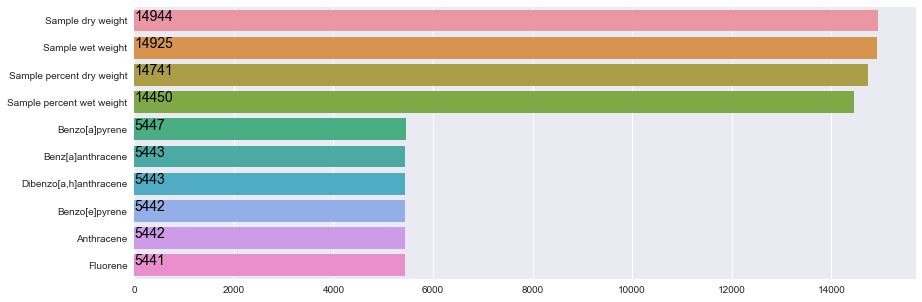

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
temp = pollutants.parameter.value_counts().head(10)
pretty_bar(temp, ax)

<a id="poll_nst_site"></a>

### [^](#toc) NST Site

"A character code that defines the NS&T sampling site name. Codes are generally defined by the site's general and specific location."

There are 3939 unique values


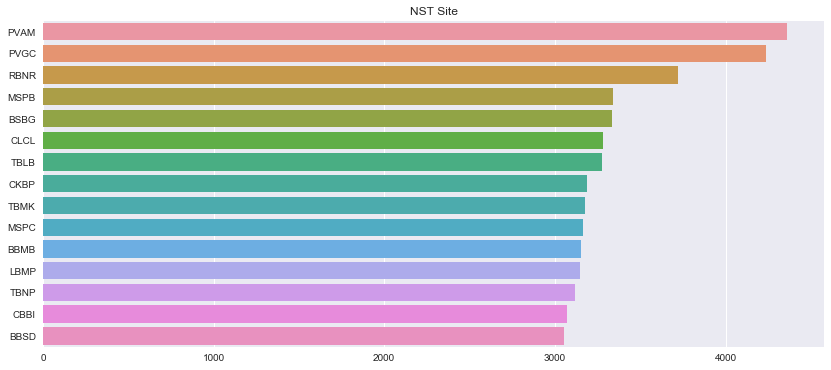

In [19]:
plt.figure(figsize=(14, 6))
temp = pollutants.nst_site.value_counts()
print("There are {}{}{} unique values".format(color.BOLD, len(temp), color.END))
_ = sns.barplot(temp.head(15).values, temp.head(15).index).set(title="NST Site")

<a id="fiscal"></a>

### [^](#toc) Fiscal Year 

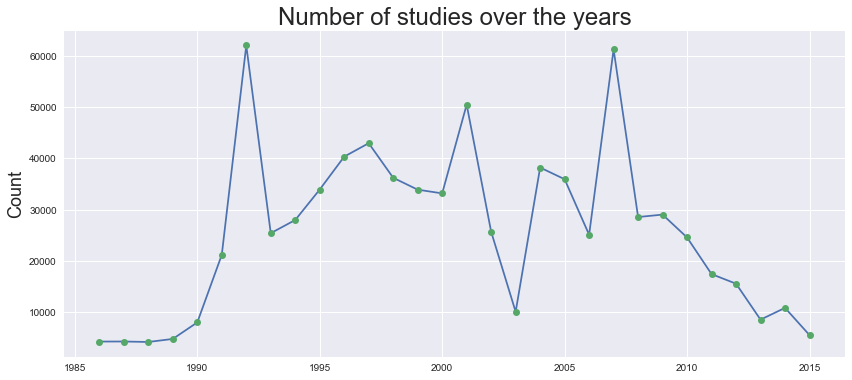

In [41]:
plt.figure(figsize=(14, 6))
plt.title("Number of studies over the years", fontsize=24)
plt.ylabel("Count", fontsize=18)

temp = pollutants.fiscal_year.value_counts().sort_index()
plt.plot(temp.index, temp.values)
_ = plt.plot(temp.index, temp.values, ".", markersize=14)

<a name="sites"></a>

# <u>Sites</u>

A lot of these columns we've seen in the pollants data

In [4]:
sites = pd.read_csv(DATA_PATH + "sites.csv")
print("Shape of site data: {}{}{}".format(color.BOLD, sites.shape, color.END))

num_cols = [col for col in sites.columns if sites[col].dtype != object]
cat_cols = [col for col in sites.columns if sites[col].dtype == object]

print("\n{}Numeric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_cols))

print("\n{}Categoric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_cols))

sites.head()

Shape of site data: (4107, 12)

Numeric columns:
latitude --- longitude

Categoric columns:
coastal_ecological_area --- general_location --- nst_site --- reg_nm --- region_name --- source_file --- specific_location --- state_name --- stratum --- study_name


,coastal_ecological_area,general_location,latitude,longitude,nst_site,reg_nm,region_name,source_file,specific_location,state_name,stratum,study_name
0,Alaskan West,Chukchi Sea,69.8383,-163.8096,AKC10-0001,Alaska,NaN,Sites_AlaskaArcticStudy.csv,Unknown,Alaska,NaN,Alaska Arctic Study
1,Alaskan West,Chukchi Sea,69.4069,-165.4180,AKC10-0002,Alaska,NaN,Sites_AlaskaArcticStudy.csv,Unknown,Alaska,NaN,Alaska Arctic Study
2,Alaskan West,Chukchi Sea,69.1504,-164.8480,AKC10-0003,Alaska,NaN,Sites_AlaskaArcticStudy.csv,Unknown,Alaska,NaN,Alaska Arctic Study
3,Alaskan West,Chukchi Sea,68.9944,-167.3424,AKC10-0004,Alaska,NaN,Sites_AlaskaArcticStudy.csv,Unknown,Alaska,NaN,Alaska Arctic Study
4,Alaskan West,Chukchi Sea,69.6116,-163.7207,AKC10-0005,Alaska,NaN,Sites_AlaskaArcticStudy.csv,Unknown,Alaska,NaN,Alaska Arctic Study


<a id="site_nan"></a>

### [^](#toc) Missing data

In [22]:
missing_cols = sites.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index
sites[missing_cols].isnull().sum()

general_location       37
reg_nm               3932
region_name           175
specific_location      95
stratum              2244
dtype: int64

<a id="site_nst"></a>

### [^](#toc) NST Site

NOTE: only 1/4 of the sites are shown.  This plot is graphics heavy and is exceding the data limit of markers

In [25]:
# Too many markers excedes the data limit
# FIXME: The data limit on Kaggle Kernels is probably different
NUM_MARKERS = 1000

m = folium.Map(location=[60, -125], zoom_start=3)
marker_cluster = MarkerCluster().add_to(m)

for lat, lon, nst_site in sites[["latitude", "longitude", "nst_site"]].values:    
    folium.Marker(
        location = [lat, lon],
        popup = nst_site,
        icon = folium.Icon(color='green', icon='ok-sign'),
    ).add_to(marker_cluster)
    
    if NUM_MARKERS == 1:
        break
    NUM_MARKERS -= 1

m

<a id="site_gen_loc"></a>

### [^](#toc) General Location

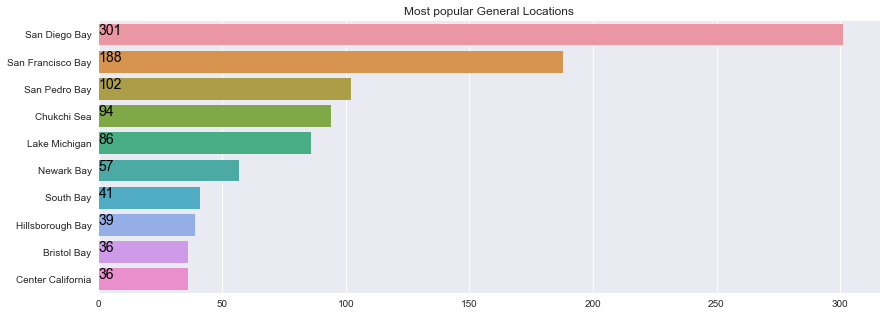

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
temp = sites.general_location.value_counts().head(10)
pretty_bar(temp, ax, title="Most popular General Locations")

---
<a name="histopaths"></a>

# [^](#toc) <u>Histopaths</u>

There appears to be a lot of columns so let's figure out the important ones

In [30]:
histopaths = pd.read_csv(DATA_PATH + "histopaths.csv")
print("Shape of histopaths data: {}{}{}".format(color.BOLD, histopaths.shape, color.END))

histopaths.head()

Shape of histopaths data: (1800, 79)


,abnormality,abnormality_description,bucephalus,ceroid,cestode_body,cestode_gill,cestode_mantle,chlamydia,ciliate_digestive_tract,ciliate_gut,ciliate_large_gill,ciliate_small_gill,coastal_ecological_area,condition_code,condition_code_description,copepod_body,copepod_gill,copepod_gut_digestive_tubule,dermo,dermo_description,dermo_infection_intensity,dermo_numerical_value,diffuse_inflammation,diffuse_necrosis,digestive_tubule_atrophy,...,proctoeces,protozoan_digestive_tubule,protozoan_gut,pseudoklossia,region,rickettsia_digestive_tubule,rickettsia_gut,sample_letter,sample_number,sex,source_file,species_name,specific_location,specific_region,state_name,station_letter,study_name,trematode_metacercariae,trematode_metacercariae_description,tumor,unidentified_gonoduct_organism,unidentified_organism,unusual_digestive_tubule,wet_weight,xenoma
0,0.0,Normal Gonad,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Alaska South Central - Cook Inlet,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,NaN,NaN,NaN,0.0,Alaska,0.0,0.0,NaN,1,Male,KachemakBay_Mussel_Histopath.csv,NaN,Chrome Bay,Alaska,Alaska,NaN,Kachemak Bay Bioeffects,0.0,Uninfected,NaN,0.0,0.0,0.0,2.4,0.0
1,0.0,Normal Gonad,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Alaska South Central - Cook Inlet,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,NaN,NaN,NaN,0.0,Alaska,0.0,0.0,NaN,2,Male,KachemakBay_Mussel_Histopath.csv,NaN,Chrome Bay,Alaska,Alaska,NaN,Kachemak Bay Bioeffects,0.0,Uninfected,NaN,0.0,0.0,0.0,1.3,0.0
2,0.0,Normal Gonad,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,7.0,Alaska South Central - Cook Inlet,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,2.0,...,NaN,NaN,NaN,0.0,Alaska,0.0,0.0,NaN,3,Unknown,KachemakBay_Mussel_Histopath.csv,NaN,Chrome Bay,Alaska,Alaska,NaN,Kachemak Bay Bioeffects,0.0,Uninfected,NaN,0.0,0.0,0.0,0.8,0.0
3,0.0,Normal Gonad,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Alaska South Central - Cook Inlet,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,NaN,NaN,NaN,0.0,Alaska,1.0,0.0,NaN,4,Unknown,KachemakBay_Mussel_Histopath.csv,NaN,Chrome Bay,Alaska,Alaska,NaN,Kachemak Bay Bioeffects,0.0,Uninfected,NaN,0.0,0.0,0.0,1.2,0.0
4,0.0,Normal Gonad,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Alaska South Central - Cook Inlet,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,2.0,...,NaN,NaN,NaN,0.0,Alaska,0.0,0.0,NaN,5,Male,KachemakBay_Mussel_Histopath.csv,NaN,Chrome Bay,Alaska,Alaska,NaN,Kachemak Bay Bioeffects,0.0,Uninfected,NaN,0.0,0.0,0.0,1.3,0.0


### Data Processsing

Interestingly, there are several columns that are completely empty!  These features are: 

#### Missing 100% of values

    edema
    gonad_subsample_wet_weight
    hydra_gill
    nemertine_gill
    other_trematode_sporocyst_gill
    other_trematode_sporocyst_gut
    tumor

Let's delete them from the dataset since they carry no information.  In addition there are also many columns that only have 10 entries present!  I've looked through each of those entries and deemed these features worthy of being dropped as well (most of them have only a single unique entry).  These features are:

#### Missing 1790 values out of 1800

    abnormality
    abnormality_description
    chlamydia
    metacercaria
    pseudoklossia
    rickettsia_digestive_tubule
    rickettsia_gut
    
Finally there are some columns that are boring and contain only one unique value.  These should be removed as well
    
#### Boring features

    ciliate_large_gill
    multinucleated_sphere_x
    pea_crab
    proctoeces
    neoplasm 
    unusual_digestive_tubule
    unidentified_gonoduct_organism

In [31]:
### Missing 100% of values
cols = ["edema", "gonad_subsample_wet_weight", "hydra_gill",
        "nemertine_gill", "other_trematode_sporocyst_gill",
        "other_trematode_sporocyst_gut", "tumor"]

### Missing 1790 values out of 1800
cols.extend(["abnormality", "abnormality_description", "chlamydia", 
        "metacercaria", "pseudoklossia", 
        "rickettsia_digestive_tubule", "rickettsia_gut"])

### Boring features
cols.extend(["ciliate_large_gill", "multinucleated_sphere_x",
             "pea_crab", "proctoeces", "neoplasm",
             "unusual_digestive_tubule", "unidentified_gonoduct_organism"])

histopaths = histopaths.drop(cols, axis=1)

### Look at all columns

In [32]:
num_cols = [col for col in histopaths.columns if histopaths[col].dtype != object]
cat_cols = [col for col in histopaths.columns if histopaths[col].dtype == object]

print("\n{}Numeric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_cols))

print("\n{}Categoric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_cols))


Numeric columns:
bucephalus --- ceroid --- cestode_body --- cestode_gill --- cestode_mantle --- ciliate_digestive_tract --- ciliate_gut --- ciliate_small_gill --- condition_code --- copepod_body --- copepod_gill --- copepod_gut_digestive_tubule --- dermo_numerical_value --- diffuse_inflammation --- diffuse_necrosis --- digestive_tubule_atrophy --- empty_displacement_volume --- fiscal_year --- focal_inflammation --- focal_necrosis --- full_displacement_volume --- latitude --- length --- longitude --- nematode --- nematopsis_body --- nematopsis_gill --- nematopsis_mantle --- protozoan_digestive_tubule --- protozoan_gut --- sample_number --- trematode_metacercariae --- unidentified_organism --- wet_weight --- xenoma

Categoric columns:
coastal_ecological_area --- condition_code_description --- dermo --- dermo_description --- dermo_infection_intensity --- digestive_tubule_atrophy_description --- general_location --- gonadal_index --- gonadal_index_description --- multinucleated_sphere_x_d

### Columns with no missing values

In [33]:
cols = histopaths.isnull().sum()
cols = pd.DataFrame(cols[cols == 0]).reset_index().drop([0], axis=1)
cols.columns = ["Column"]
cols

,Column
0,coastal_ecological_area
1,fiscal_year
2,general_location
3,gonadal_index_description
4,latitude
5,length
6,longitude
7,nst_sample_id
8,nst_site
9,region


<a id="hist_nan"></a>

### [^](#toc) Missing values

In [34]:
missing_cols = histopaths.isnull().sum()
missing_cols = histopaths[missing_cols[missing_cols > 0].index].isnull().sum()
missing_cols = missing_cols.reset_index()
missing_cols.columns = ["Column", "Num missing"]

missing_cols

,Column,Num missing
0,bucephalus,1382
1,ceroid,467
2,cestode_body,1392
3,cestode_gill,1392
4,cestode_mantle,1392
5,ciliate_digestive_tract,1382
6,ciliate_gut,1382
7,ciliate_small_gill,1382
8,condition_code,925
9,condition_code_description,925


### Categorical features

coastal_ecological_area --- condition_code_description --- dermo --- dermo_description --- dermo_infection_intensity --- digestive_tubule_atrophy_description --- general_location --- gonadal_index --- gonadal_index_description --- multinucleated_sphere_x_description --- nst_sample_id --- nst_site --- region --- sample_letter --- specific_location --- specific_region --- state_name --- station_letter --- study_name --- trematode_metacercariae_description

In [45]:
# fig, ax = plt.subplots(1, 1, figsize=(14, 5))
# _ = sns.countplot(histopaths.sex)
# pretty_bar(histopaths.source_file.value_counts(), ax)
# pretty_bar(histopaths.species_name.value_counts(), ax)
histopaths.state_name.value_counts()

Florida        485
Michigan       300
New York       240
Ohio           225
Louisiana      176
Texas          125
Wisconsin       75
Mississippi     61
Indiana         40
Illinois        35
Alabama         28
Alaska          10
Name: state_name, dtype: int64

### Location

### Correlation plot

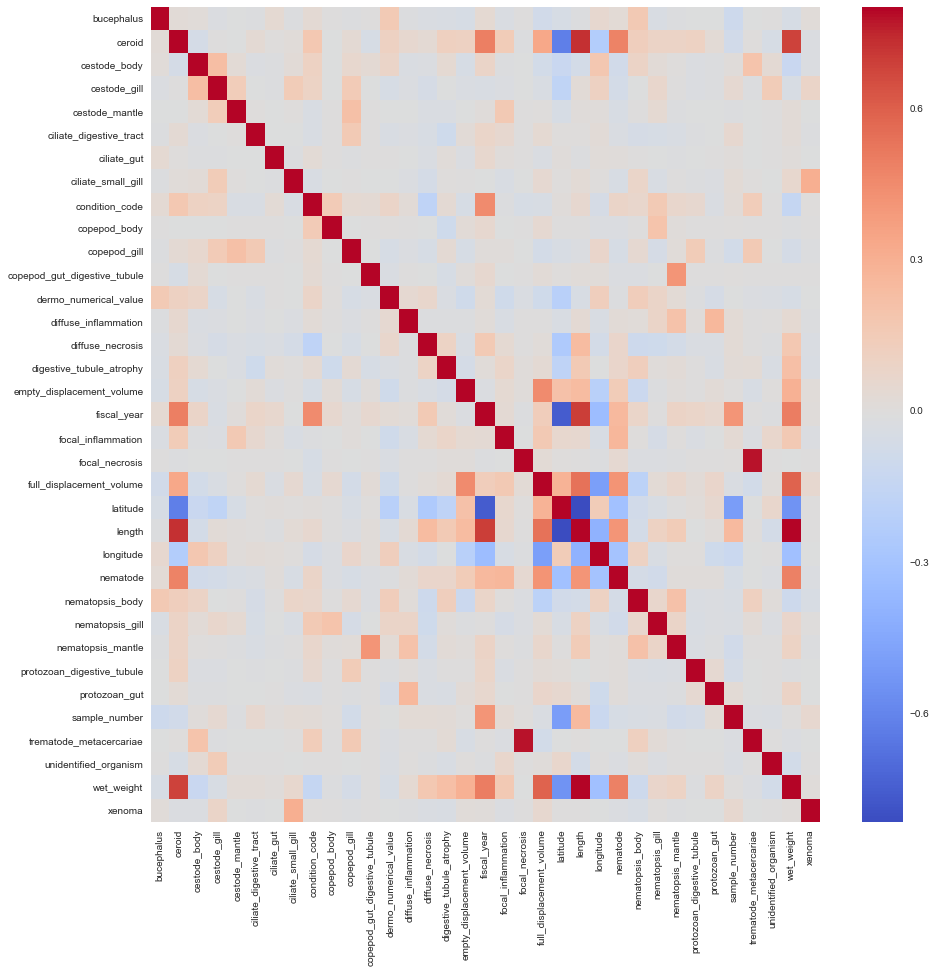

In [36]:
f, ax = plt.subplots(figsize=(15, 15))

_ = sns.heatmap(histopaths.corr(), vmax=.8, cmap="coolwarm")

<a id="hist_nst_site"></a>

### [^](#toc) NST Site

A character code that defines the NS&T sampling site name. Codes are generally defined by the site's general and specific location.